# Using Deep-Learning on UCI's Wine DataSet with Keras

In [1]:
# Import Statements 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read the CSV files
red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv")

### We print the head rows for both the wine types followed by checking for NULL cases inside these datasets.

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
(pd.isnull(red)).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


In [6]:
(pd.isnull(white)).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898


In [7]:
# Adding an extra columns "type" for depiction of the type of Wine.
white['type'] = 1
red['type'] = 0
wines = red.append(white, ignore_index=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


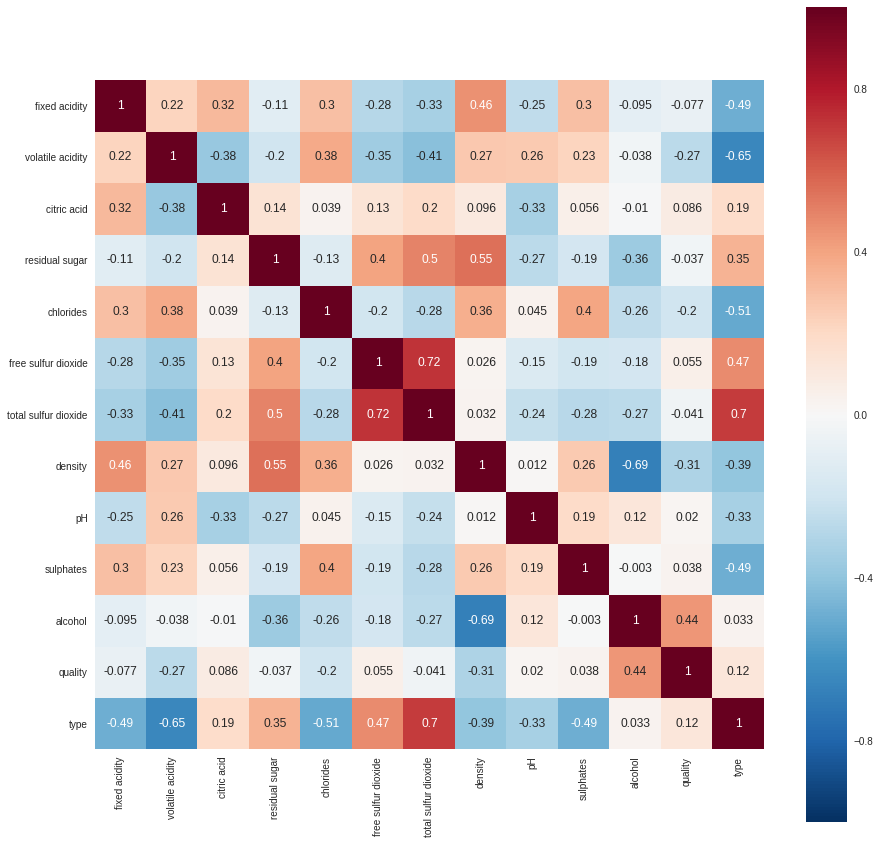

In [8]:
# Correlation Heatmap
corr = wines.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=1, square=True, annot=True)
sns.plt.show()

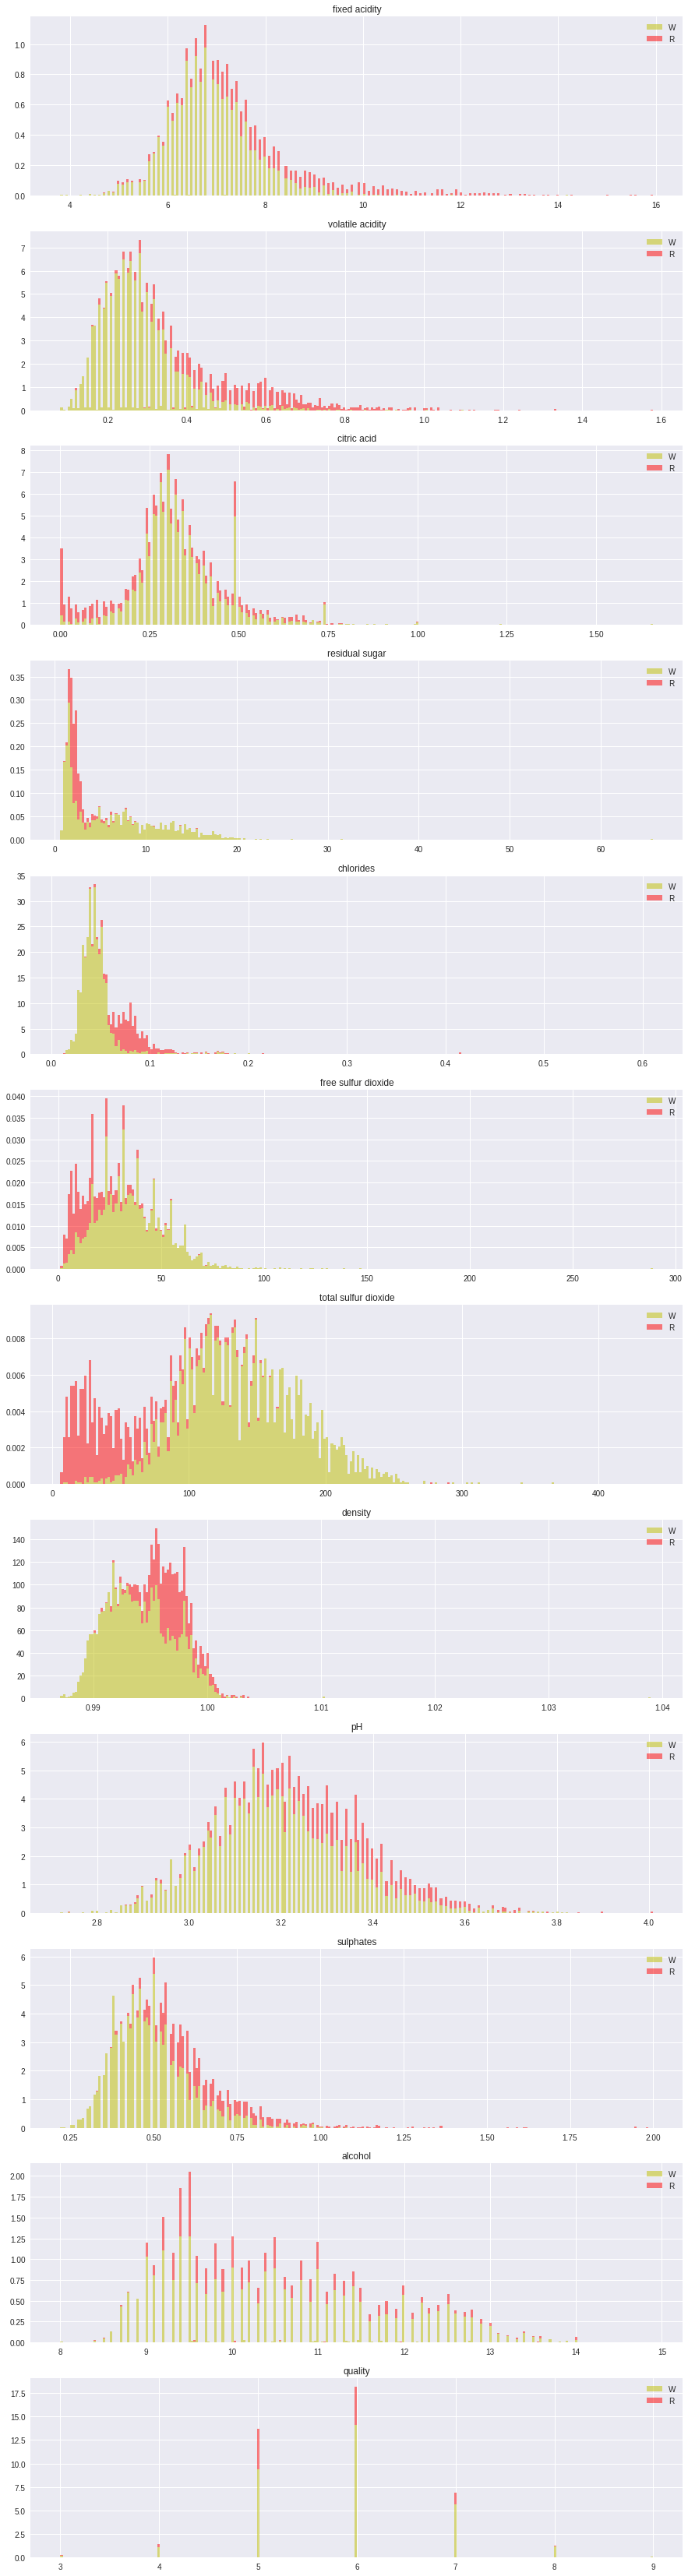

In [28]:
# Histograms
features = wines.columns.values[:-1]
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(wines[features[idx]]) - min(wines[features[idx]]))/250
    ax.hist([white[features[idx]],red[features[idx]]], bins=np.arange(min(wines[features[idx]]), max(wines[features[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['W','R'],color=['y','r'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.show()

In [29]:
# Splitting the Dataset into Test and Train
from sklearn.model_selection import train_test_split
X=  wines.ix[:,0:11]
y=np.ravel(wines.type)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=42)

In [30]:
# Preprocessing the Data
from sklearn import preprocessing
X_train = pd.DataFrame(preprocessing.scale(X_train))
X_train.columns = list(features[0:11])
X_test = pd.DataFrame(preprocessing.scale(X_test))
X_test.columns = list(features[0:11])

In [31]:
from sklearn import datasets, neighbors, linear_model
logistic = linear_model.LogisticRegression()
print(logistic.fit(X_train, y_train).score(X_test, y_test))
knn = neighbors.KNeighborsClassifier()
print(knn.fit(X_train, y_train).score(X_test, y_test))


0.989611388996
0.989996152366
